In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


1- Dataset Loading

In [2]:

# Load the dataset
df = pd.read_csv("../data/Phishing_URL_Dataset.csv")  

2- Data Exploring

In [3]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
df.shape

(235795, 56)

3- Data Cleaning

In [6]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print(df.columns)

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [9]:
#show all columns with object data type
object_columns = df.select_dtypes(include='object')
print(object_columns.columns)

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [10]:
df=df.drop(['FILENAME','Domain', 'DomainLength',
       'TLD', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 
       'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit',  'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
        'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'], axis=1)






4- Data Visualization

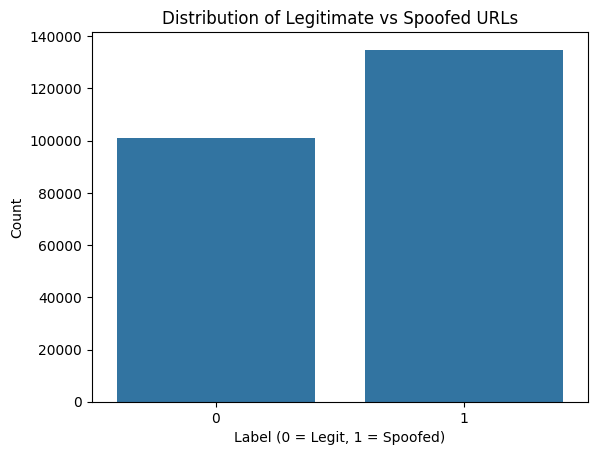

In [11]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Legitimate vs Spoofed URLs')
plt.xlabel('Label (0 = Legit, 1 = Spoofed)')
plt.ylabel('Count')
plt.show()

5- Feature Extractions

In [12]:

#Select relevant features and target variable
df["URL"] = df["URL"].astype(str)


In [13]:
import re
# Defining a function to clean up the text
def Clean(url):
    url = url.lower()
    return url

df["URL"] = df["URL"].apply(Clean)


In [14]:
print(df.columns)

Index(['URL', 'URLLength', 'IsDomainIP', 'URLSimilarityIndex', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'HasSocialNet', 'HasCopyrightInfo',
       'label'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["label"])

In [16]:
df.shape

(235795, 13)

In [17]:
df=df.drop(['label'], axis=1)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5))
X = vectorizer.fit_transform(df["URL"])


In [19]:
df.head()

,URL,URLLength,IsDomainIP,URLSimilarityIndex,NoOfSubDomain,HasObfuscation,NoOfDegitsInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,HasSocialNet,HasCopyrightInfo
0,https://www.southbankmosaics.com,31,0,100.0,1,0,0,1,0.032,1,0,1
1,https://www.uni-mainz.de,23,0,100.0,1,0,0,2,0.087,1,1,1
2,https://www.voicefmradio.co.uk,29,0,100.0,2,0,0,2,0.069,1,0,1
3,https://www.sfnmjournal.com,26,0,100.0,1,0,0,1,0.038,1,1,1
4,https://www.rewildingargentina.org,33,0,100.0,1,0,0,1,0.030,1,1,1


In [22]:
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
# اختيار الأعمدة العددية اللي هتضميها
numerical_features = [
    'URLLength', 'IsDomainIP', 'URLSimilarityIndex', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'HasSocialNet', 'HasCopyrightInfo'
]
# Standardization
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[['URLLength', 'IsDomainIP', 'URLSimilarityIndex', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'HasSocialNet', 'HasCopyrightInfo']])

X_numeric = df[numerical_features]


In [23]:
from scipy.sparse import hstack

X_combined = hstack([X, X_numeric])

In [24]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# train the model
model = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(max_depth=10, random_state=42)

In [25]:
# accuracy of the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.65      0.79     20124
           1       0.80      1.00      0.88     27035

    accuracy                           0.85     47159
   macro avg       0.89      0.83      0.84     47159
weighted avg       0.88      0.85      0.84     47159



5- Save Model

In [26]:

import pickle

# Save the model
with open("../models/URLSpoofingNLP_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
# Save the TF-IDF vectorizer
with open("../models/URLSpoofingNLP_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(X, vectorizer_file)


print("Model saved successfully!")

Model saved successfully!


6- Test Model

In [30]:
import tldextract
import re
import pandas as pd
import numpy as np
from urllib.parse import urlparse


def extract_features(url):
    # استخراج خصائص الـ URL
    URLLength = len(url)
    
    # استخراج الدومين
    domain = re.findall(r'://([^/]+)/?', url)
    domain = domain[0] if domain else ""
    
    IsDomainIP = 1 if re.match(r'^\d+\.\d+\.\d+\.\d+$', domain) else 0
    URLSimilarityIndex = 0  # لنحسبها في وقت لاحق إذا لزم الأمر
    
    subdomains = url.split(".")[:-2]
    NoOfSubDomain = len(subdomains)
    
    HasObfuscation = 1 if re.search(r'[%$&*#@]', url) else 0
    
    NoOfDegitsInURL = sum(c.isdigit() for c in url)
    
    special_chars = "!@#$%^&*()_+=-[]{}|;:',.<>?/"
    NoOfOtherSpecialCharsInURL = sum(1 for c in url if c in special_chars)
    
    SpacialCharRatioInURL = NoOfOtherSpecialCharsInURL / len(url) if len(url) > 0 else 0
    
    IsHTTPS = 1 if url.lower().startswith("https://") else 0
    
    social_networks = ["facebook", "twitter", "linkedin", "instagram", "tiktok"]
    HasSocialNet = 1 if any(sn in url.lower() for sn in social_networks) else 0
    
    HasCopyrightInfo = 1 if "copyright" in url.lower() else 0
    
    return {
        'URLLength': URLLength,
        'IsDomainIP': IsDomainIP,
        'URLSimilarityIndex': URLSimilarityIndex,
        'NoOfSubDomain': NoOfSubDomain,
        'HasObfuscation': HasObfuscation,
        'NoOfDegitsInURL': NoOfDegitsInURL,
        'NoOfOtherSpecialCharsInURL': NoOfOtherSpecialCharsInURL,
        'SpacialCharRatioInURL': SpacialCharRatioInURL,
        'IsHTTPS': IsHTTPS,
        'HasSocialNet': HasSocialNet,
        'HasCopyrightInfo': HasCopyrightInfo
    }

# البيانات اللي هتختبر عليها
test_URL = [
    "www.example1.com",
    "www.phishing-example.com",
    "www.Go0ggle.com",
    "www.facebook.com",
    "www.amazon.com",
    "www.microsoft.com"
]

# استخراج الخصائص من URLs
test_features = pd.DataFrame([extract_features(url) for url in test_URL])
test_features_scaled = scaler.transform(test_features)
test_features_tfidf = vectorizer.transform(test_URL)
final_test_features = hstack([test_features_scaled, test_features_tfidf])


predictions = model.predict(final_test_features)

# عرض كل موقع جنبه هل هو حقيقي أم مزيف
for url, pred in zip(test_URL, predictions):
    result = 'Legit' if pred == 0 else 'Spoofed'
    print(f"URL: {url} => {result}")

URL: www.example1.com => Legit
URL: www.phishing-example.com => Legit
URL: www.Go0ggle.com => Legit
URL: www.facebook.com => Legit
URL: www.amazon.com => Legit
URL: www.microsoft.com => Legit


---------------------------------------------------------------------------------------------------
as a machine learning not coming with true predection so we need to work with NLP